<a href="https://colab.research.google.com/github/Ebrebello/Ebrebello/blob/main/IdadeAbalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Número de variáveis: 9
Número de instâncias: 4177
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sexo             4177 non-null   object 
 1   Comprimento      4177 non-null   float64
 2   Diametro         4177 non-null   float64
 3   Altura           4177 non-null   float64
 4   Peso total       4177 non-null   float64
 5   Peso descascado  4177 non-null   float64
 6   Peso vísceras    4177 non-null   float64
 7   Peso concha      4177 non-null   float64
 8   Anéis            4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None
       Comprimento     Diametro       Altura   Peso total  Peso descascado  \
count  4177.000000  4177.000000  4177.000000  4177.000000      4177.000000   
mean      0.523992     0.407881     0.139516     0.828742         0.359367   
std       0.120093     0.099240    

<Figure size 1500x1000 with 0 Axes>

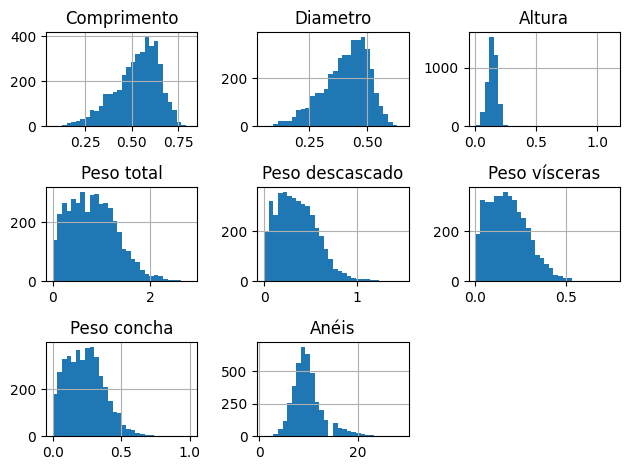

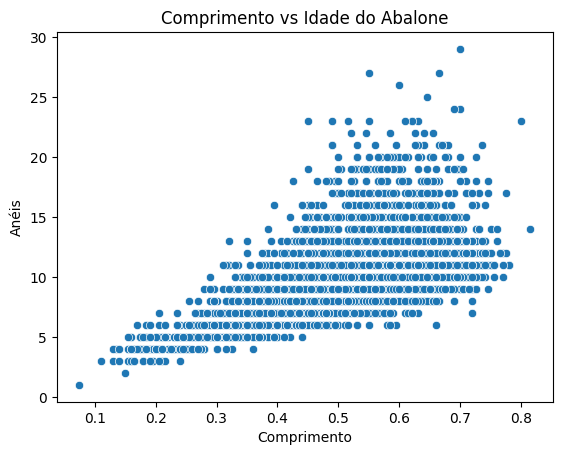

R²: 0.5481628137889265
RMSE: 2.211613087121836


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
# Previsão da Idade do Abalone

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
# Alterada a URL para apontar para o arquivo de dados correto
dados = pd.read_csv(url, header=None, names=['Sexo', 'Comprimento', 'Diametro', 'Altura', 'Peso total', 'Peso descascado', 'Peso vísceras', 'Peso concha', 'Anéis'])
# Adicionado header=None porque o arquivo não tem linha de cabeçalho
# Adicionado names para especificar os nomes das colunas

print(f"Número de variáveis: {dados.shape[1]}")
print(f"Número de instâncias: {dados.shape[0]}")
print(dados.info())
print(dados.describe())

plt.figure(figsize=(15, 10))
dados.hist(bins=30)
plt.tight_layout()
plt.show()

sns.scatterplot(data=dados, x='Comprimento', y='Anéis')
# Alterado 'Idade' para 'Anéis' para corresponder ao nome real da coluna
plt.title('Comprimento vs Idade do Abalone')
plt.show()

# Converter a coluna 'Sexo' para numérica usando one-hot encoding
dados = pd.get_dummies(dados, columns=['Sexo'], drop_first=True)

X = dados.drop('Anéis', axis=1)  # Variáveis independentes
# Alterado 'Idade' para 'Anéis'
y = dados['Anéis']  # Variável dependente
# Alterado 'Idade' para 'Anéis'

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

y_pred = modelo.predict(X_teste)

r2 = r2_score(y_teste, y_pred)
rmse = mean_squared_error(y_teste, y_pred, squared=False)

print(f"R²: {r2}")
print(f"RMSE: {rmse}")

# Discussão dos Resultados

# O R² indica a proporção da variabilidade na variável dependente que é explicada pelas variáveis independentes.
# Um R² próximo a 1 sugere que o modelo é bom em prever a idade do abalone.
# O RMSE fornece uma medida da média dos erros de previsão, onde valores mais baixos indicam previsões mais precisas.

# Limitações do modelo:
# 1. Se o modelo não capturar relações não lineares, isso pode afetar a precisão das previsões.
# 2. A presença de outliers pode distorcer os resultados e a avaliação do modelo.
# 3. A qualidade das variáveis independentes é crucial. Se algumas delas não estiverem relacionadas à idade do abalone, o modelo pode não performar bem.